In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/inputs/P6/II/'
messi = cv2.imread(path+'messi.png')
trump = cv2.imread(path+'trump.png')
mask = cv2.imread(path+'messi_trump_mask.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask[mask<=112] = 0
mask[mask>112] = 1 

In [3]:
def gaussian(m,n,sigma):
    gaussian_filter = np.zeros((m,n))
    a = m//2
    b = n//2
    for x in range(-a, a):
        for y in range(-b, b):
            x1 = np.sqrt(2*np.pi*(sigma**2))
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+a-1, y+b-1] = x2
    return gaussian_filter

In [4]:
def filtered(img, layer, laplacian=False):
    grad_layers = []
    for i in range(1,layer+1):
        sigma = 2**(i-1)
        gaussian_filter = gaussian(img.shape[0],img.shape[1],sigma)
        img_fft = np.fft.fftshift(np.fft.fft2(img))
        filtered_fft = img_fft*gaussian_filter
        filtered_img = np.abs(np.fft.ifft2(filtered_fft))
        grad_layers.append(filtered_img)
    if laplacian:
        laplacian_layers = []
        for j in range(1,layer):
            laplacian_layers.append(grad_layers[j-1]-grad_layers[j])
        laplacian_layers.append(grad_layers[layer-1]-img)
    return laplacian_layers if laplacian else grad_layers

In [5]:
def combine(grad_mask, laplacian_a, laplacian_b, layer):
    combine_layers = []
    combined_img = np.zeros((grad_mask[0].shape[0],grad_mask[0].shape[1]))
    for i in range(layer):
        c = np.multiply(grad_mask[i],laplacian_a[i])+np.multiply(1-grad_mask[i],laplacian_b[i])
        combine_layers.append(c)
        combined_img += c
    return combined_img

In [6]:
layers = [6,12,18]

# num of layers=6

In [7]:
messi_laplacian,trump_laplacian = [],[]

In [8]:
for c in range(3):
    messi_laplacian.append(filtered(messi[:,:,c],layers[0],True))
    trump_laplacian.append(filtered(trump[:,:,c],layers[0],True))
mask_gradient = filtered(mask,layers[0])

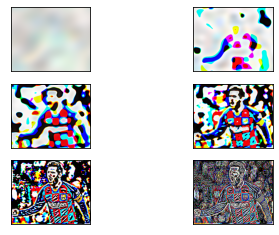

In [9]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((messi_laplacian[2][j],messi_laplacian[1][j],messi_laplacian[0][j])).astype('uint8'))
plt.show()

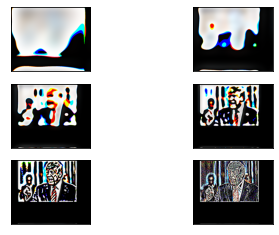

In [10]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((trump_laplacian[2][j],trump_laplacian[1][j],trump_laplacian[0][j])).astype('uint8'))
plt.show()

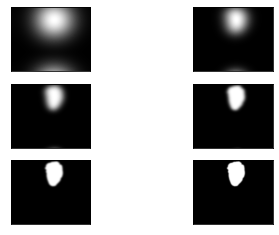

In [11]:
plt.figure()
for j in range(layers[0]):
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [12]:
messi_trump_rgb = []
for i in range(3):
    ms = combine(mask_gradient, trump_laplacian[i], messi_laplacian[i], layers[0])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    messi_trump_rgb.append(ms)
messi_trump = np.dstack((messi_trump_rgb[0],messi_trump_rgb[1],messi_trump_rgb[2]))
messi_trump = cv2.cvtColor(messi_trump.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/II/'
#plt.imsave(path+'messi_trump_'+str(layers[0])+'.png', messi_trump)

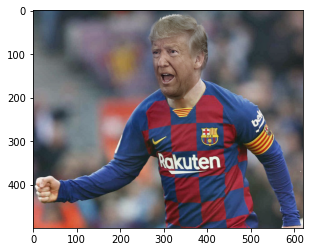

In [13]:
plt.imshow(messi_trump)
plt.show()

# num of layers=12

In [14]:
messi_laplacian,trump_laplacian = [],[]

In [15]:
for c in range(3):
    messi_laplacian.append(filtered(messi[:,:,c],layers[1],True))
    trump_laplacian.append(filtered(trump[:,:,c],layers[1],True))
mask_gradient = filtered(mask,layers[1])

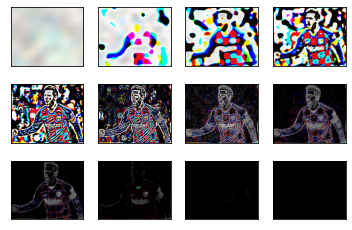

In [16]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((messi_laplacian[2][j],messi_laplacian[1][j],messi_laplacian[0][j])).astype('uint8'))
plt.show()

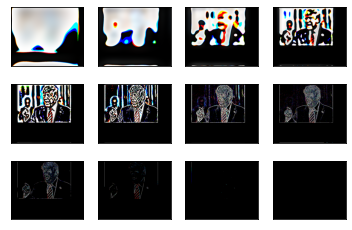

In [17]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((trump_laplacian[2][j],trump_laplacian[1][j],trump_laplacian[0][j])).astype('uint8'))
plt.show()

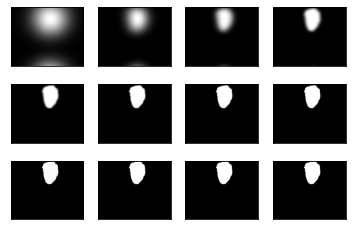

In [18]:
plt.figure()
for j in range(layers[1]):
    plt.subplot(3,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [19]:
messi_trump_rgb = []
for i in range(3):
    ms = combine(mask_gradient, trump_laplacian[i], messi_laplacian[i], layers[1])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    messi_trump_rgb.append(ms)
messi_trump = np.dstack((messi_trump_rgb[0],messi_trump_rgb[1],messi_trump_rgb[2]))
messi_trump = cv2.cvtColor(messi_trump.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/II/'
#plt.imsave(path+'messi_trump_'+str(layers[1])+'.png', messi_trump)

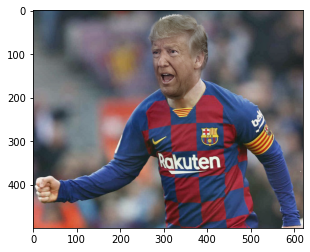

In [20]:
plt.imshow(messi_trump)
plt.show()

# num of layers=18

In [21]:
messi_laplacian,trump_laplacian = [],[]

In [22]:
for c in range(3):
    messi_laplacian.append(filtered(messi[:,:,c],layers[2],True))
    trump_laplacian.append(filtered(trump[:,:,c],layers[2],True))
mask_gradient = filtered(mask,layers[2])

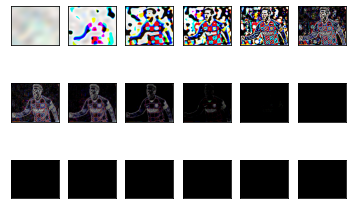

In [23]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((messi_laplacian[2][j],messi_laplacian[1][j],messi_laplacian[0][j])).astype('uint8'))
plt.show()

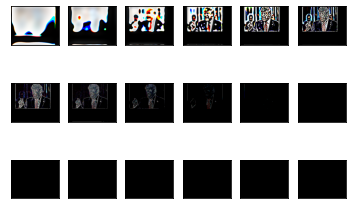

In [24]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.dstack((trump_laplacian[2][j],trump_laplacian[1][j],trump_laplacian[0][j])).astype('uint8'))
plt.show()

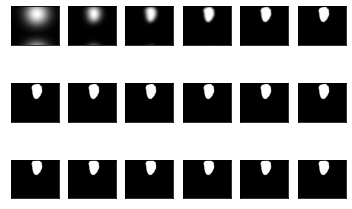

In [25]:
plt.figure()
for j in range(layers[2]):
    plt.subplot(3,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mask_gradient[j], cmap='gray')
plt.show()

In [26]:
messi_trump_rgb = []
for i in range(3):
    ms = combine(mask_gradient, trump_laplacian[i], messi_laplacian[i], layers[2])
    ms = (1-((ms-np.min(ms))/(np.max(ms)-np.min(ms))))*255
    messi_trump_rgb.append(ms)
messi_trump = np.dstack((messi_trump_rgb[0],messi_trump_rgb[1],messi_trump_rgb[2]))
messi_trump = cv2.cvtColor(messi_trump.astype('uint8'), cv2.COLOR_BGR2RGB)
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P6/II/'
#plt.imsave(path+'messi_trump_'+str(layers[2])+'.png', messi_trump)

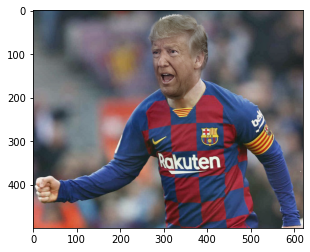

In [27]:
plt.imshow(messi_trump)
plt.show()